<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Supervised Learning - Ranfom Forest - Medical Insurance
</b></font> </br></p>

---


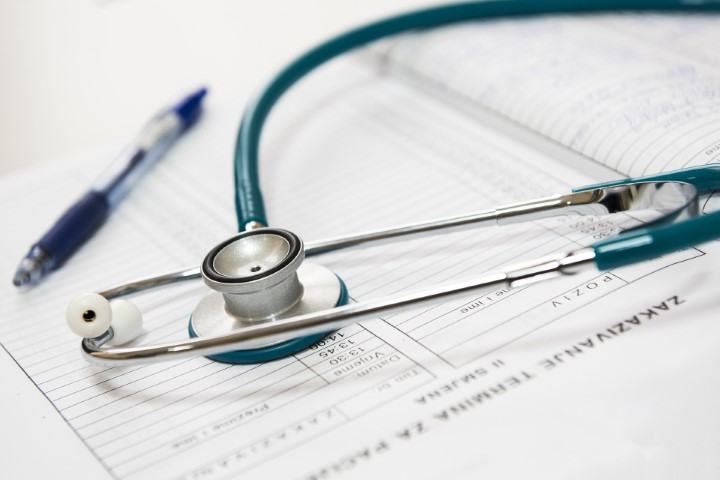

Image by <a href="https://pixabay.com/users/darkostojanovic-638422/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=563427">Darko Stojanovic</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=563427">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   

Der Datensatz enthält Informationen zu Kosten für Krankenversicherungen in Abhängigkeit gesundheitlichen Merkmalen.


[DataSet](https://www.kaggle.com/datasets/mirichoi0218/insurance)

[Info](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/ml-kurs/02 data/Insurance.csv', header=0)

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ralf-42/ml-kurs/main/02%20data/Insurance.csv', header=0)

In [4]:
label ='charges'
features = [n for n in df.columns if n != label]

In [5]:
target = df[label].copy()
data = df[features].copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.0,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,1.094918,1.205493,0.00,0.00000,1.0,2.00000,5.00


In [8]:
data.describe(include=object).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [9]:
data.corr()

,age,bmi,children
age,1.000000,0.109272,0.042469
bmi,0.109272,1.000000,0.012759
children,0.042469,0.012759,1.000000


# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [10]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Codierung
</font></p>

In [11]:
from sklearn.preprocessing import OrdinalEncoder
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])

<p><font color='black' size="5">
Skalierung
</font></p>

In [12]:
from sklearn.preprocessing import StandardScaler
data[num_col] = StandardScaler().fit_transform(data[num_col])

# **3 <font color='orange'>|</font>  Modeling**
---

<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [13]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=42)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((936, 6), (402, 6), (936,), (402,))

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_features=4, max_depth=3, min_samples_leaf=40)
model.fit(data_train, target_train)

RandomForestRegressor(max_depth=3, max_features=4, min_samples_leaf=40)

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">
Prognose
</font></p>

In [15]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)


<p><font color='black' size="5">
Bestimmtheitsmass
</font></p>


In [16]:
from sklearn.metrics import r2_score
r2_train = r2_score(target_train, target_train_pred)
print(f'Modell: {model} -- Train --- Bestimmtheitsmass: {r2_train:5.2f}' )

Modell: RandomForestRegressor(max_depth=3, max_features=4, min_samples_leaf=40) -- Train --- Bestimmtheitsmass:  0.82


In [17]:
r2_test = r2_score(target_test, target_test_pred)
print(f'Modell: {model} -- Test --- Bestimmtheitsmass: {r2_test:5.2f}' )

Modell: RandomForestRegressor(max_depth=3, max_features=4, min_samples_leaf=40) -- Test --- Bestimmtheitsmass:  0.83


<p><font color='black' size="5">
Feature Importance
</font></p>

In [18]:
import plotly.express as px
px.bar(x=model.feature_importances_, y=data.columns).update_yaxes(categoryorder="total ascending")

<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [19]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real'] = pd.DataFrame(target_test.values, columns=['real'])
cube['predict'] = pd.DataFrame(target_test_pred, columns=['predict'])

In [20]:
# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA(n_components=2)
pca_np = pca.fit_transform(scale(data_test))
pca_df = pd.DataFrame(pca_np)

# Cube um pca erweitern
col_name = [("PCA" + str(i+1)) for i in range(pca_np.shape[1])]
pca_df = pd.DataFrame(pca_np, columns=col_name)
cube = pd.concat([cube, pca_df], axis=1)

<p><font color='black' size="5">
Visalisierung real vs predict
</font></p>

In [21]:
import plotly.express as px
import plotly.subplots as sp

In [22]:
# Boxplot
title_ = 'Boxplot real vs predict'
px.box(cube[['real', 'predict']], title=title_, width=600, height=600)

In [23]:
# Histogramm
title_ = 'Histogramm real vs predict'
fig = px.histogram(cube, x=['real', 'predict'], text_auto=".2s", nbins=2, title=title_)
fig.update_layout(barmode='group',bargap=0.1, width=800, height=600)
fig.show()

In [24]:
# 2 x Scatterplots

# cube['real_cat'] = cube['real'].astype(str)
# cube['predict_cat'] = cube['predict'].astype(str)

# Farbzuteilung für Kategoriewerte
color_mapping = {'0': 'red', '1': 'blue'}

title_ = 'Streupunktdiagramm real'
img1 = px.scatter(cube, x='PCA1', y='PCA2', color='real', color_discrete_map=color_mapping, width=600, height=600)

title_ = 'Streupunktdiagramm predict'
img2 = px.scatter(cube, x='PCA1', y='PCA2', color='predict', color_discrete_map=color_mapping, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Scatterplot real', 'Scatterplot predict'))

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text=title_)

# Plot anzeigen
fig.show()

<p><font color='black' size="5">
Residuals Plot
</font></p>

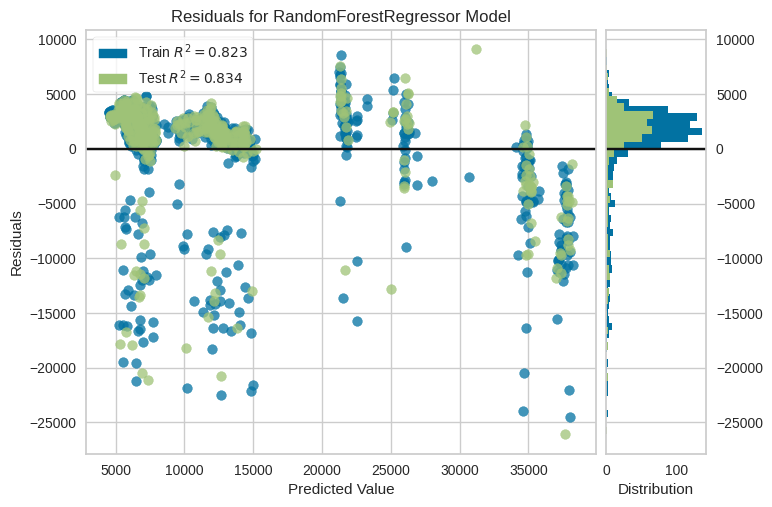

In [25]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, data_train, target_train, data_test, target_test)

# **5 <font color='orange'>|</font> Deploy**
---